Let us start by importing all the required libraries:

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import scipy

# Problem 4

(a) Load the Dataset

1. Load the Iris dataset using sklearn.datasets.load_iris().

In [2]:
iris = sklearn.datasets.load_iris()

2. Extract all four features as input and extract the class labels (0,1, or 2).

In [3]:
X = iris.data #features
y = iris.target.reshape(-1,1) # class labels

encoder = sklearn.preprocessing.OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

(b) Preprocess the Data

1. Split the dataset into training $(60\%)$ and test $(40\%)$ sets.

In [4]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.6)

2. Implement the model using three appraoches: normalizing the feature values, standardizing the feature values, and leaving the feature values unprocessed.
Normalization (Min-Max Scaling) rescales feature values to the range $[0,1]$.
\begin{equation*}
x_{\text{norm}} = \frac{x-\text{min}(x)}{\text{max}(x)-\text{min}(x)}
\end{equation*}
Standardization (Z-score Normalization) transforms feature values so that they have a mean of $0$ and a standard deviation of $1$.
\begin{equation*}
x_{\text{std}}=\frac{x-\mu}{\sigma}.
\end{equation*}
Here, $\mu$ is the mean and $\sigma$ is the standard deviation of $x$.

To do this, we will use MinMaxScaler() and StandardScaler() which are already defined in the module sklearn.

In [5]:
MinMax = sklearn.preprocessing.MinMaxScaler()
Std = sklearn.preprocessing.StandardScaler()

X_train_norm = MinMax.fit_transform(X_train)
X_test_norm = MinMax.transform(X_test)

X_train_std = Std.fit_transform(X_train)
X_test_std = Std.transform(X_test)

(c) Implement Softmax Function

1. Write a function that applies the softmac transformation to a set of logits.

In [6]:
def softmax(logits):
    return np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)

(d) Implement Multiclass Logistic Regression.

1. Use the softmax function to compute probabilities.

2. Implement the categorical cross-entropy loss function.
For a dataset with $m$ examples, the average cross-entropy loss function is defined as:
\begin{equation*}
L=-\frac{1}{m}\sum_{i=1}^{m}\sum_{j=1}^{k}y_{ij}\log({\hat{y}_{ij}})
\end{equation*}
where:
* $L$ is the average cross-entropy loss over all samples.
* $m$ is the total number of samples in the dataset.
* $y_{ij}$ is the $j$-th component of the one-hot encoded true label for the $i$-th sample.
* $\hat{y}_{ijj}$ is the $j$-th component of the predicted probability for the $i$-th sample.

In [7]:
def categorical_cross_entropy_loss(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

3. Train the Model

* Implemet gradient descent and stochastic gradient descent (separately) to train the model.

* Track the loss during training.

GD and SGD using data which was normalized using MinMax Scaling

In [8]:
num_features = X_train.shape[1]
num_classes = y_train.shape[1]
W = np.random.randn(num_features, num_classes)

def train_logistic_regression_gd(X, y ,learning_rate=0.01, epochs=1000):

    m, n = X.shape
    k = y.shape[1]

    #Initialize some random weights
    W = np.random.randn(n, k) * 0.01

    loss_history = []

    for epoch in range(epochs):

        logits = np.dot(X,W)
        
        #Softmax evaluation
        y_pred = softmax(logits)

        loss = categorical_cross_entropy_loss(y, y_pred)
        loss_history.append(loss)

        #Gradient Descent
        dW = (1/m) * np.dot(X.T, (y_pred - y))
        W -= learning_rate * dW

        if epoch % 100 == 0:
            print(f"GD Epoch {epoch}/{epochs}, Loss: {loss:f}")
    
    return W, loss_history

def train_logistic_regression_sgd(X, y, learning_rate=0.01, epochs=1000):

    m, n = X.shape
    k = y.shape[1]

    #Initialize some random weights
    W = np.random.randn(n, k) * 0.01

    loss_history = []

    for epoch in range(epochs):

        total_loss = 0

        for i in range(m):
            
            x_i = X[i].reshape(1, -1)
            y_i = y[i].reshape(1, -1)

            logits = np.dot(x_i, W)
            
            #Softmax evaluation
            y_pred = softmax(logits)

            loss = categorical_cross_entropy_loss(y_i, y_pred)
            total_loss += loss

            #Stochastic Gradient Descent
            dW = np.dot(x_i.T, (y_pred - y_i))
            W -= learning_rate * dW

        avg_loss = total_loss / m
        loss_history.append(avg_loss)

        if epoch % 100 == 0:
            print(f"SGD Epoch {epoch}/{epochs}, Loss: {avg_loss:f}")

    return W, loss_history

#Training the model using Gradient Descent and Normalized Data;
W_gd_norm, loss_gd_norm = train_logistic_regression_gd(X_train_norm, y_train)

#Training the model using Stochastic Gradient Descent and Normalized Data
W_sgd_norm, loss_sgd_norm = train_logistic_regression_sgd(X_train_norm, y_train)

GD Epoch 0/1000, Loss: 1.100428
GD Epoch 100/1000, Loss: 1.037481
GD Epoch 200/1000, Loss: 0.993991
GD Epoch 300/1000, Loss: 0.961097
GD Epoch 400/1000, Loss: 0.934251
GD Epoch 500/1000, Loss: 0.911124
GD Epoch 600/1000, Loss: 0.890495
GD Epoch 700/1000, Loss: 0.871698
GD Epoch 800/1000, Loss: 0.854345
GD Epoch 900/1000, Loss: 0.838201
SGD Epoch 0/1000, Loss: 1.068385
SGD Epoch 100/1000, Loss: 0.514478
SGD Epoch 200/1000, Loss: 0.465763
SGD Epoch 300/1000, Loss: 0.446054
SGD Epoch 400/1000, Loss: 0.435015
SGD Epoch 500/1000, Loss: 0.427809
SGD Epoch 600/1000, Loss: 0.422655
SGD Epoch 700/1000, Loss: 0.418739
SGD Epoch 800/1000, Loss: 0.415641
SGD Epoch 900/1000, Loss: 0.413118


GD and SGD using Standardized data

In [9]:
#Training the model using Gradient Descent and Standardized Data
W_gd_std, loss_gd_std = train_logistic_regression_gd(X_train_std, y_train)

#Training the model using Stochastic Gradient Descent
W_sgd_std, loss_sgd_std = train_logistic_regression_sgd(X_train_std, y_train)

GD Epoch 0/1000, Loss: 1.100093
GD Epoch 100/1000, Loss: 0.633669
GD Epoch 200/1000, Loss: 0.515486
GD Epoch 300/1000, Loss: 0.464001
GD Epoch 400/1000, Loss: 0.434563
GD Epoch 500/1000, Loss: 0.415028
GD Epoch 600/1000, Loss: 0.400818
GD Epoch 700/1000, Loss: 0.389834
GD Epoch 800/1000, Loss: 0.380971
GD Epoch 900/1000, Loss: 0.373594
SGD Epoch 0/1000, Loss: 0.831367
SGD Epoch 100/1000, Loss: 0.290990
SGD Epoch 200/1000, Loss: 0.283812
SGD Epoch 300/1000, Loss: 0.281061
SGD Epoch 400/1000, Loss: 0.279543
SGD Epoch 500/1000, Loss: 0.278580
SGD Epoch 600/1000, Loss: 0.277913
SGD Epoch 700/1000, Loss: 0.277420
SGD Epoch 800/1000, Loss: 0.277040
SGD Epoch 900/1000, Loss: 0.276734


GD and SGD using unprocessed data:

In [10]:
#Training the model using Gradient Descent and unprocessed data
W_gd, loss_gd = train_logistic_regression_gd(X_train, y_train)

#Training the model using Stochastic Gradient Descent and unprocessed data.
W_sgd, loss_sgd = train_logistic_regression_sgd(X_train, y_train)

GD Epoch 0/1000, Loss: 1.089610
GD Epoch 100/1000, Loss: 0.691408
GD Epoch 200/1000, Loss: 0.563838
GD Epoch 300/1000, Loss: 0.500892
GD Epoch 400/1000, Loss: 0.461139
GD Epoch 500/1000, Loss: 0.432345
GD Epoch 600/1000, Loss: 0.409719
GD Epoch 700/1000, Loss: 0.391000
GD Epoch 800/1000, Loss: 0.374980
GD Epoch 900/1000, Loss: 0.360943
SGD Epoch 0/1000, Loss: 0.961931
SGD Epoch 100/1000, Loss: 0.149540
SGD Epoch 200/1000, Loss: 0.118136
SGD Epoch 300/1000, Loss: 0.107103
SGD Epoch 400/1000, Loss: 0.101591
SGD Epoch 500/1000, Loss: 0.098327
SGD Epoch 600/1000, Loss: 0.096189
SGD Epoch 700/1000, Loss: 0.094694
SGD Epoch 800/1000, Loss: 0.093598
SGD Epoch 900/1000, Loss: 0.092767


4. Evaluate the Model

* Compute accuracy on the test set.

(a) Normalized Data

In [11]:
def predict(X, W):
    logits = np.dot(X, W)
    return np.argmax(softmax(logits), axis=1)

y_pred_gd_norm = predict(X_test, W_gd_norm)

y_pred_sgd_norm = predict(X_test, W_sgd_norm)

y_test_labels = np.argmax(y_test, axis=1)

print("\nGradient Descent Performance:")
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test_labels, y_pred_gd_norm):f}")

print("\nStochastic Gradient Descent Performance:")
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test_labels, y_pred_sgd_norm):f}")


Gradient Descent Performance:
Accuracy: 0.533333

Stochastic Gradient Descent Performance:
Accuracy: 0.666667


(b) Standardized Data

In [12]:
y_pred_gd_std = predict(X_test, W_gd_std)

y_pred_sgd_std = predict(X_test, W_sgd_std)

y_test_labels = np.argmax(y_test, axis=1)

print("\nGradient Descent Performance:")
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test_labels, y_pred_gd_std):f}")

print("\nStochastic Gradient Descent Performance:")
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test_labels, y_pred_sgd_std):f}")


Gradient Descent Performance:
Accuracy: 0.333333

Stochastic Gradient Descent Performance:
Accuracy: 0.350000


(c) Unprocessed Data

In [13]:
y_pred_gd = predict(X_test, W_gd)

y_pred_sgd = predict(X_test, W_sgd)

y_test_labels = np.argmax(y_test, axis=1)

print("\nGradient Descent Performance:")
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test_labels, y_pred_gd):f}")

print("\nStochastic Gradient Descent Performance:")
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test_labels, y_pred_sgd):f}")


Gradient Descent Performance:
Accuracy: 0.916667

Stochastic Gradient Descent Performance:
Accuracy: 0.966667


* Generate a classification report (precision, recall, F1-score) and confusion matrix.

(a) Models trained using Normalized Data:

In [14]:
#For Logistic Regression using Gradient Descent
print(sklearn.metrics.classification_report(y_test_labels, y_pred_gd_norm, target_names=iris.target_names))

#For logistic Regression using Stochastic Gradient Descent
print(sklearn.metrics.classification_report(y_test_labels, y_pred_sgd_norm, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      0.71      0.83        17
  versicolor       0.00      0.00      0.00        23
   virginica       0.42      1.00      0.59        20

    accuracy                           0.53        60
   macro avg       0.47      0.57      0.47        60
weighted avg       0.42      0.53      0.43        60

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.53      1.00      0.70        23
   virginica       0.00      0.00      0.00        20

    accuracy                           0.67        60
   macro avg       0.51      0.67      0.57        60
weighted avg       0.49      0.67      0.55        60



c:\Users\prane\Documents\Ashoka\MATCS\CS-3410\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prane\Documents\Ashoka\MATCS\CS-3410\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prane\Documents\Ashoka\MATCS\CS-3410\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

(b) Models trained using Standardized Data:

In [15]:
#For Logistic Regression using Gradient Descent
print(sklearn.metrics.classification_report(y_test_labels, y_pred_gd_std, target_names=iris.target_names))

#For logistic Regression using Stochastic Gradient Descent
print(sklearn.metrics.classification_report(y_test_labels, y_pred_sgd_std, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00        17
  versicolor       0.00      0.00      0.00        23
   virginica       0.33      1.00      0.50        20

    accuracy                           0.33        60
   macro avg       0.11      0.33      0.17        60
weighted avg       0.11      0.33      0.17        60

              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00        17
  versicolor       0.50      0.04      0.08        23
   virginica       0.34      1.00      0.51        20

    accuracy                           0.35        60
   macro avg       0.28      0.35      0.20        60
weighted avg       0.31      0.35      0.20        60



c:\Users\prane\Documents\Ashoka\MATCS\CS-3410\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prane\Documents\Ashoka\MATCS\CS-3410\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prane\Documents\Ashoka\MATCS\CS-3410\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

(c) Models trained using Unprocessed Data:

In [16]:
#For Logistic Regression using Gradient Descent
print(sklearn.metrics.classification_report(y_test_labels, y_pred_gd, target_names=iris.target_names))

#For logistic Regression using Stochastic Gradient Descent
print(sklearn.metrics.classification_report(y_test_labels, y_pred_sgd, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.78      0.88        23
   virginica       0.80      1.00      0.89        20

    accuracy                           0.92        60
   macro avg       0.93      0.93      0.92        60
weighted avg       0.93      0.92      0.92        60

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.91      0.95        23
   virginica       0.91      1.00      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



5. Visualize the Training Performance

* Plot the loss curve over epochs.

(a) Loss curve plotted over Epochs for Models trained using Normalized Data:

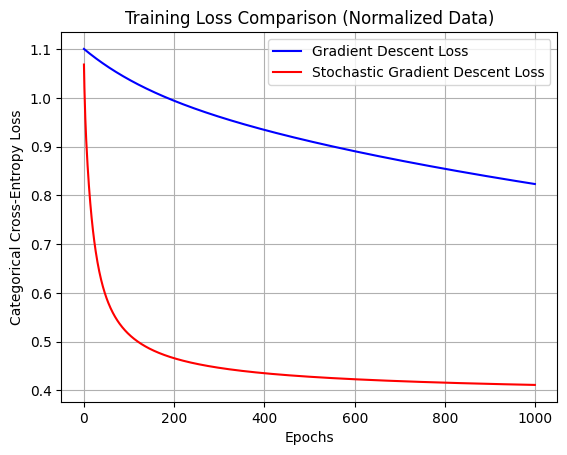

In [17]:
plt.plot(loss_gd_norm, label="Gradient Descent Loss", color="blue")
plt.plot(loss_sgd_norm, label="Stochastic Gradient Descent Loss", color="red")
plt.title("Training Loss Comparison (Normalized Data)")
plt.xlabel("Epochs")
plt.ylabel("Categorical Cross-Entropy Loss")
plt.legend()
plt.grid(True)
plt.show()

(b) Loss curve plotted over Epochs for Models trained using Standardized Data:

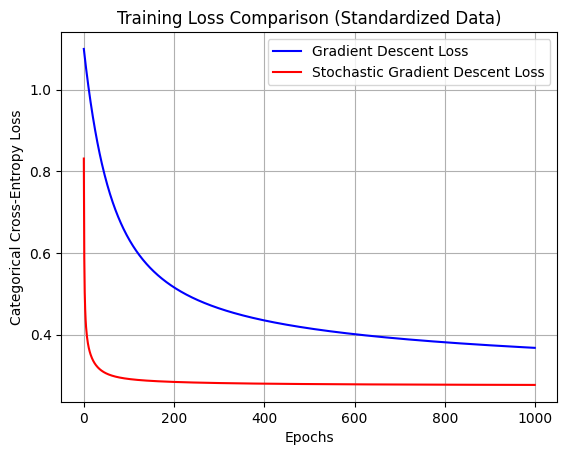

In [18]:
plt.plot(loss_gd_std, label="Gradient Descent Loss", color="blue")
plt.plot(loss_sgd_std, label="Stochastic Gradient Descent Loss", color="red")
plt.title("Training Loss Comparison (Standardized Data)")
plt.xlabel("Epochs")
plt.ylabel("Categorical Cross-Entropy Loss")
plt.legend()
plt.grid(True)
plt.show()

(c) Loss curve plotted over Epochs for Models trained using Unprocessed Data:

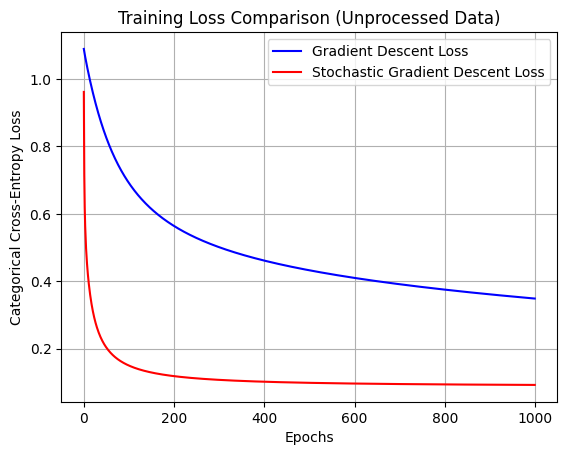

In [19]:
plt.plot(loss_gd, label="Gradient Descent Loss", color="blue")
plt.plot(loss_sgd, label="Stochastic Gradient Descent Loss", color="red")
plt.title("Training Loss Comparison (Unprocessed Data)")
plt.xlabel("Epochs")
plt.ylabel("Categorical Cross-Entropy Loss")
plt.legend()
plt.grid(True)
plt.show()

# Problem 5

(a) Data Loading & Preprocessing

1. Loading the data into a Pandas DataFrame

In [20]:
data = r'Concrete_data.xls'
df = pd.read_excel(data)

2. Display the first few rows to understand its structure.

In [21]:
print(df.head())

   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0      

3. We now identify and distingush Independent variables (Features) and Dependent variables (Compressive Strength) accordingly into $X$ and $y$

In [22]:
X = df.loc[:, ["Cement (component 1)(kg in a m^3 mixture)",
       "Blast Furnace Slag (component 2)(kg in a m^3 mixture)",
       "Fly Ash (component 3)(kg in a m^3 mixture)",
       "Water  (component 4)(kg in a m^3 mixture)",
       "Superplasticizer (component 5)(kg in a m^3 mixture)",
       "Coarse Aggregate  (component 6)(kg in a m^3 mixture)",
       "Fine Aggregate (component 7)(kg in a m^3 mixture)",
       "Age (day)"] ]

y = df.loc[:, ["Concrete compressive strength(MPa, megapascals) "]]

4. To verify that there are no missing values in $X$ and $y$, we run:

In [23]:
print(pd.isna(X))
print(pd.isna(y))

      Cement (component 1)(kg in a m^3 mixture)  \
0                                         False   
1                                         False   
2                                         False   
3                                         False   
4                                         False   
...                                         ...   
1025                                      False   
1026                                      False   
1027                                      False   
1028                                      False   
1029                                      False   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                 False       
1                                                 False       
2                                                 False       
3                                                 False       
4                                                 False       
...      

5. Let us now split the dataset into $80\%$ training and $20\%$ testing.

In [24]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.2, random_state=42)

(b) Implementing Linear Regression

1. Using scikit-learn, let us train a Linear Regression model based on our training split data

In [25]:
linear_model = sklearn.linear_model.LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

2. We will now evaluate the model's performance using Mean Squared Error $(MSE)$ and Coefiicient of Determination $(R^{2})$.

In [26]:
y_pred_linear = linear_model.predict(X_test)


mse_linear = sklearn.metrics.mean_squared_error(y_test, y_pred_linear)
r2_linear = sklearn.metrics.r2_score(y_test, y_pred_linear)

print("MSE for Linear Regression: ", mse_linear)
print("R^2 for Linear Regression: ", r2_linear)

MSE for Linear Regression:  95.97548435337701
R^2 for Linear Regression:  0.6275416055429022


3. Plot the predicted vs. actual values to visualize model fit.

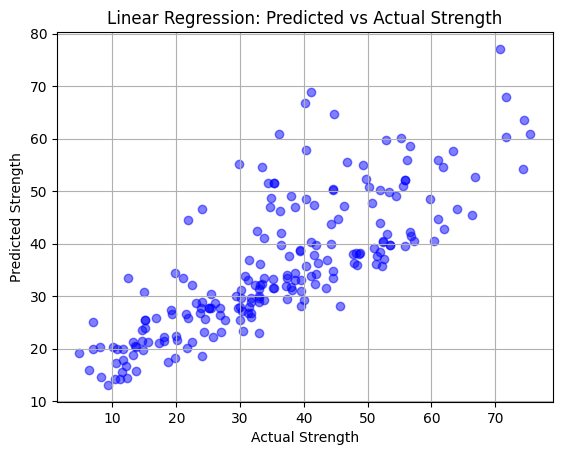

(50,)


In [27]:
plt.scatter(y_test, y_pred_linear, color = "blue", alpha=0.5)
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.title("Linear Regression: Predicted vs Actual Strength")
plt.grid(True)
plt.show()

x_vals = np.linspace(min(X_test.T[0]), max(X_test.T[0]))
print(x_vals.shape)

(c) Implementing Polynomial Regression $(k=2,3,4)$

We will now transform features to include polynomial terms using PolynomialFeatures from sklearn.preprocessing. As we train the polynomial regression models for each of the degrees, we also evaluate their performance using $MSE$ and $R^{2}$, and print them accordingly. Then, similar to what we did with linear regression, we plot a scatterplot of the predicted vs. actual values for each polynomial degree.

MSE for Polynnomial Regression (Degree 2):  55.589926374944625
R^2 Score for Polynnomial Regression (Degree 2):  0.7842685049718989


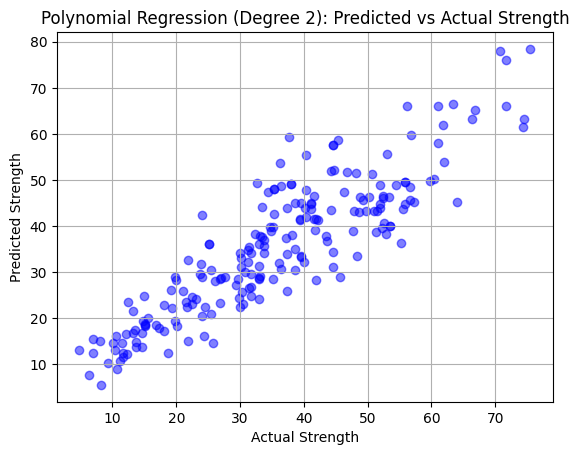

MSE for Polynnomial Regression (Degree 3):  40.271174725585
R^2 Score for Polynnomial Regression (Degree 3):  0.8437169952071737


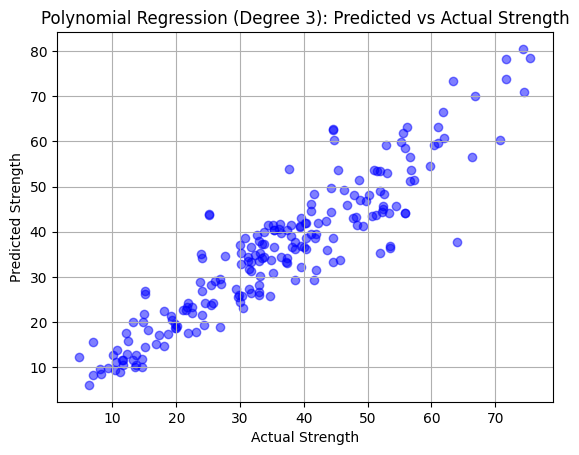

MSE for Polynnomial Regression (Degree 4):  677.4235886700546
R^2 Score for Polynnomial Regression (Degree 4):  -1.6289224160037916


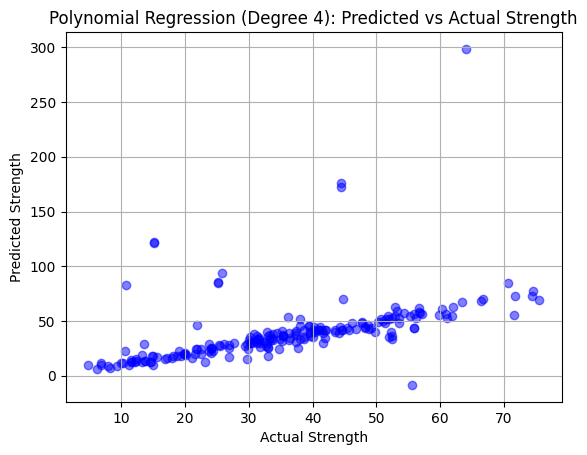

In [28]:
polynomial_pred = [y_pred_linear]
mse_polynomials = []
r2_polynomials =[]

for k in [2,3,4]:

    polynomial = sklearn.preprocessing.PolynomialFeatures(degree=k)

    X_train_polynomial = polynomial.fit_transform(X_train)
    X_test_polynomial = polynomial.transform(X_test)

    polynomial_model = sklearn.linear_model.LinearRegression()
    polynomial_model.fit(X_train_polynomial, y_train)

    y_pred_polynomial = polynomial_model.predict(X_test_polynomial)

    polynomial_pred.append(y_pred_polynomial)

    mse_polynomial = sklearn.metrics.mean_squared_error(y_test, y_pred_polynomial)
    r2_polynomial = sklearn.metrics.r2_score(y_test, y_pred_polynomial)

    mse_polynomials.append(mse_polynomial)
    r2_polynomials.append(r2_polynomial)

    print(f"MSE for Polynnomial Regression (Degree {k}): ", mse_polynomial)
    print(f"R^2 Score for Polynnomial Regression (Degree {k}): ", r2_polynomial) 

    plt.scatter(y_test, y_pred_polynomial, color = "blue", alpha=0.5)
    plt.xlabel("Actual Strength")
    plt.ylabel("Predicted Strength")
    plt.title(f"Polynomial Regression (Degree {k}): Predicted vs Actual Strength")
    plt.grid(True)
    plt.show()

(d) Visualizing & Comparing Results

1. Overlay the linear regression line and polynomial regression curves on the scatter plot of the actual data.

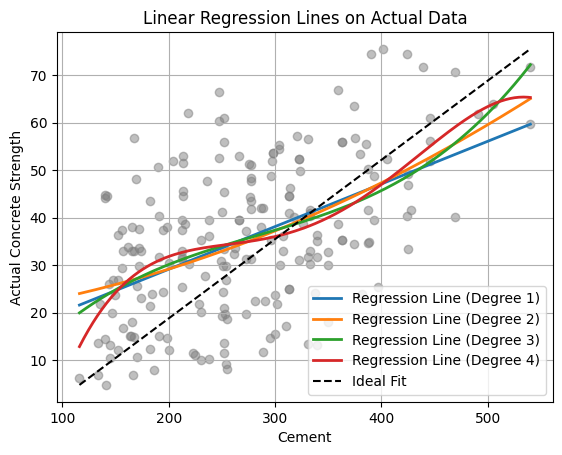

In [29]:
for i in range(1,5):
    
    polynomial = sklearn.preprocessing.PolynomialFeatures(degree=i)

    X_poly = polynomial.fit_transform(X_test[:, 0].reshape(-1, 1))

    polynomial_model = sklearn.linear_model.LinearRegression()
    polynomial_model.fit(X_poly, y_test)

    x_vals = np.linspace(min(X_test[:, 0]), max(X_test[:, 0]), 200).reshape(-1, 1)
    x_vals_polynomial = polynomial.transform(x_vals)

    y_line = polynomial_model.predict(x_vals_polynomial)

    plt.plot(x_vals, y_line, linewidth=2, label=f"Regression Line (Degree {i})")

plt.plot([X_test[:, 0].min(), X_test[:, 0].max()], [y_test.min(), y_test.max()], color="black", linestyle="--", label="Ideal Fit")
plt.scatter(X_test[:, 0], y_test, color="gray", alpha=0.5)
plt.xlabel("Cement")
plt.ylabel("Actual Concrete Strength")
plt.title("Linear Regression Lines on Actual Data")
plt.legend()
plt.grid(True)
plt.show()

2. Compare the $MSE$ and $R^{2}$ scores for all models.

In [30]:
print(f"Linear Regression (Degree 1):")
print(f"    MSE: {mse_linear:f}")
print(f"    R^2 Score: {r2_linear:f}")

for k in range(3):
    print(f"Linear Regression (Degree {k+2}):")
    print(f"    MSE: {mse_polynomials[k]:f}")
    print(f"    R^2 Score: {r2_polynomials[k]:f}")

Linear Regression (Degree 1):
    MSE: 95.975484
    R^2 Score: 0.627542
Linear Regression (Degree 2):
    MSE: 55.589926
    R^2 Score: 0.784269
Linear Regression (Degree 3):
    MSE: 40.271175
    R^2 Score: 0.843717
Linear Regression (Degree 4):
    MSE: 677.423589
    R^2 Score: -1.628922


(e) Bias-Variance Tradeoff Analysis

1. Discuss the bias-variance tradeoff based on the results:

* Which model had high bias and low variance?

* Which model has low bias but high variance?

* Which model achieves a balance between bias and variance?

The Linear Regression model of Degree $1$ had high bias and low variance, while the Linear Regression model of Degree $4$ had low bias and high variance. The Linear Regresion model with degree $3$ achieves a balance between bias and variance, as it can be observed from the evaluation of $MSE$ and $R^{2}$ score we have evaluated for this model.

2. Exaplain why higher-degree polynomials tend to overfit the data.

Although higher-degree polynomials have a larger hypothesis spaces, due to them being more curved, it increases the model's variance and reduces its ability to generalize. They might consider even the smallest fluctuations on the training data, which might not necessarily represent the true underlying trend, and this results in a overfitted model that performs well on training data but poorly on unseen data.

# Problem 6

(a) Data Simulation

1. Simulate a dataset of $1000$ samples drawn from a univariate normal distribution with mean $\mu=50$ and standard deviation $\sigma=10$.

In [31]:
data = np.random.normal(loc = 50, scale = 10, size = 1000)

2. Plot a histogram of the simulated data.

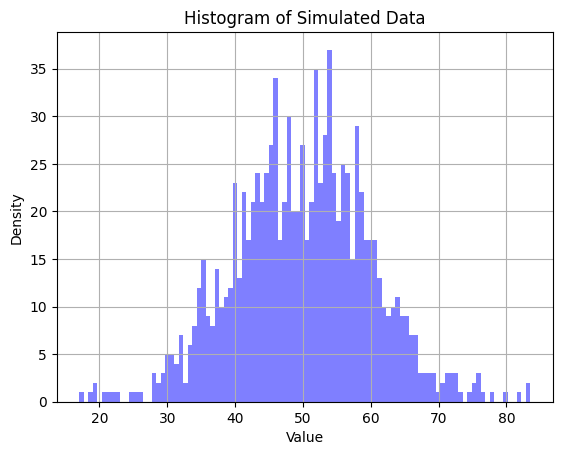

In [32]:
plt.hist(data, bins = 100, color='blue', alpha=0.5)
plt.title("Histogram of Simulated Data")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()

(b) Normal Distribution Fitting

1. Using the dataset from part $1$, fit a normal distribution by estimating the parameters (mean and standard deviation) using Maximum Likelihood Estimation $(MLE)$

Using MLE, we estimate that

\begin{equation*}

\hat{\mu} = \frac{1}{n}\sum_{i=1}^{n}x_{i},

\end{equation*}

and

\begin{equation*}

\hat{\sigma^{2}} = \frac{1}{n}\sum_{i=1}^{n}(x_{i}-\hat{\mu})^{2},

\end{equation*}

where

* $n$ is the total number of data points, and
* $x_{i}$ denotes the $i$-th data point.

In [33]:
mu_hat = np.mean(data)
sigma_hat = np.sqrt(np.mean((data - mu_hat)**2))

2. Overlay the probability density function $(PDF)$ of the fitted normal distribution on the histogram.

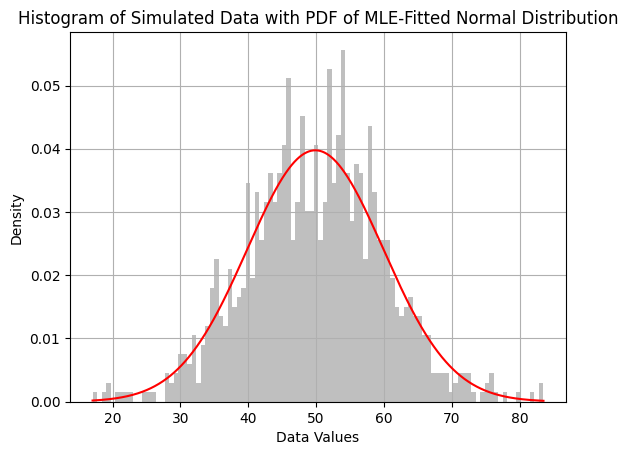

In [34]:
x = np.linspace(min(data), max(data), 1000)
pdf = scipy.stats.norm.pdf(x, mu_hat, sigma_hat)

plt.hist(data, bins=100, density=True, color="gray", alpha=0.5)
plt.plot(x, pdf, color="red", label="PDF of fitted Normal Distribution using MLE")
plt.title("Histogram of Simulated Data with PDF of MLE-Fitted Normal Distribution")
plt.xlabel("Data Values")
plt.ylabel("Density")
plt.grid(True)
plt.show()

(c) Handling Outliers

1. Simulate an additional $50$ samples from a uniform distribution over the interval $[100,150]$ and add these to your original dataset, introducing outliers.

In [35]:
outliers = np.random.uniform(100, 150, size=50)
data_with_outliers = np.concatenate([data, outliers])

2. Fit a normal distribution to this new dataset (which now contains outliers) using $MLE$.

In [36]:
mu_hat_with_outliers = np.mean(data_with_outliers)
sigma_hat_with_outliers = np.sqrt(np.mean((data_with_outliers - mu_hat_with_outliers)**2))

3. Compare and discuss how outliers affect the estimated parameters, and describe an approach to detect any outliers in the dataset.

We can observe from below that the data, when considered with outliers increased the estimated parameters $\hat{\mu}$ and $\hat{\sigma^{2}}$

In [37]:
print(f"Original Dataset: μ = {mu_hat:f}, σ = {sigma_hat:f}")
print(f"Dataset with Outliers: μ = {mu_hat_with_outliers:f}, σ = {sigma_hat_with_outliers:f}")

Original Dataset: μ = 49.899168, σ = 10.034219
Dataset with Outliers: μ = 53.572246, σ = 19.434525


When we plot the histogram of the data with outliers, and the pdf generated by our $MLE$ estimators (similar to part $(b)$), we can visually observe how much the parameters have varied because of the outliers.

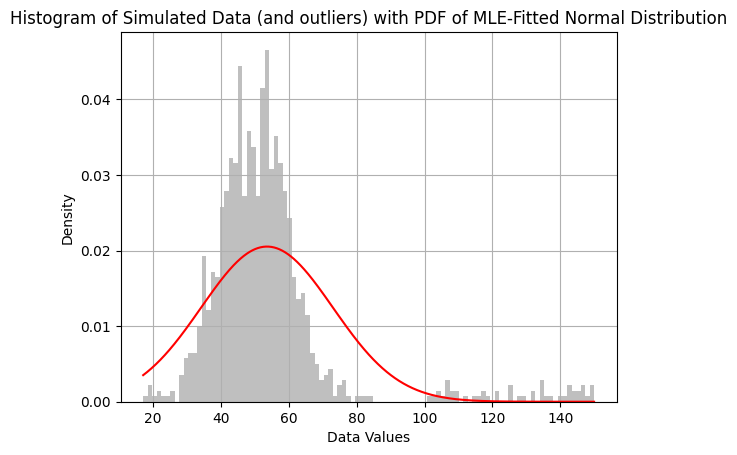

In [38]:
x = np.linspace(min(data_with_outliers), max(data_with_outliers), 1000)
pdf = scipy.stats.norm.pdf(x, mu_hat_with_outliers, sigma_hat_with_outliers)

plt.hist(data_with_outliers, bins=100, density=True, color="gray", alpha=0.5)
plt.plot(x, pdf, color="red", label="PDF of fitted Normal Distribution using MLE")
plt.title("Histogram of Simulated Data (and outliers) with PDF of MLE-Fitted Normal Distribution")
plt.xlabel("Data Values")
plt.ylabel("Density")
plt.grid(True)
plt.show()

To detect these outliers, let us just verify their $Z$-score. 

In [39]:
z_scores = scipy.stats.zscore(data_with_outliers)
outlier_values = data_with_outliers[np.where(np.abs(z_scores) > 3)]

print(f"Detected Outliers: {outlier_values}")

Detected Outliers: [132.1423086  148.95990974 137.18993096 143.85809353 139.40467525
 129.16474152 112.09446991 145.85156037 148.01420525 134.10909648
 149.98639384 125.11567868 117.09159679 125.14146074 146.42851997
 114.21394491 125.99080823 140.79695666 127.52586411 135.04308172
 148.89091937 146.50770625 136.59490144 134.96469395 143.28035028
 118.48224701 132.43999102 146.63851086 117.48562459 145.89928493
 142.55539441 115.97110835 144.07117035 121.05297878 135.30116563
 121.7397767  142.94887575]
